# Dimensionality Reduction Plot
In this notebook, we reduce a multivariate time series using dimensionality reduction and plot its segmentation.

In [1]:
# needed fpr PDF/A
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from src.utils import load_raw_has_datasets
from claspy.segmentation import BinaryClaSPSegmentation
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection

import os
import sys

sys.path.append("../../")

Let's start by loading the data and selecting a time series.

In [3]:
df_data = load_raw_has_datasets()
df_data.head()

,dataset,window_size,change_points,labels,time_series
0,indoor_subject1_routine1 (id125),50,"[1461, 2952, 4473, 5022, 6460]","[1, 0, 1, 2, 0, 3]","[[0.5025029458177382, 0.78151899859646, 0.4075..."
1,indoor_subject1_routine1 (id140),50,"[772, 2056, 3521, 4835, 5283, 6893]","[2, 1, 3, 1, 2, 0, 3]","[[0.41870591057777035, 0.8157450984128195, 0.3..."
2,indoor_subject1_routine1 (id93),50,"[1211, 2043, 2836, 3529, 4036]","[2, 4, 0, 1, 3, 4]","[[0.6809143354242022, 0.8390696507060063, 0.34..."
3,indoor_subject1_routine1 (id52),50,"[739, 1433, 2044, 2875, 3589]","[0, 1, 2, 3, 1, 0]","[[0.5215244935774459, 0.7310931419213416, 0.50..."
4,indoor_subject1_routine1 (id221),50,"[1506, 3033, 4477, 5348, 6805]","[2, 0, 2, 3, 0, 1]","[[0.48401058282315657, 0.6748131355527517, 0.5..."


In [4]:
idx = 0
row = df_data.iloc[idx, :]

T = row.iloc[8:17].tolist()

We compute the dimensionality reduction and then plot its segmentation.

In [5]:
t_pca = PCA(n_components=1, random_state=2357).fit_transform(np.array(T).T).flatten()
t_ica = FastICA(n_components=1, random_state=2357).fit_transform(np.array(T).T).flatten()
t_rp = GaussianRandomProjection(n_components=1, random_state=2357).fit_transform(np.array(T).T).flatten()

/Users/ermshaua/miniconda3/envs/mclasp/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


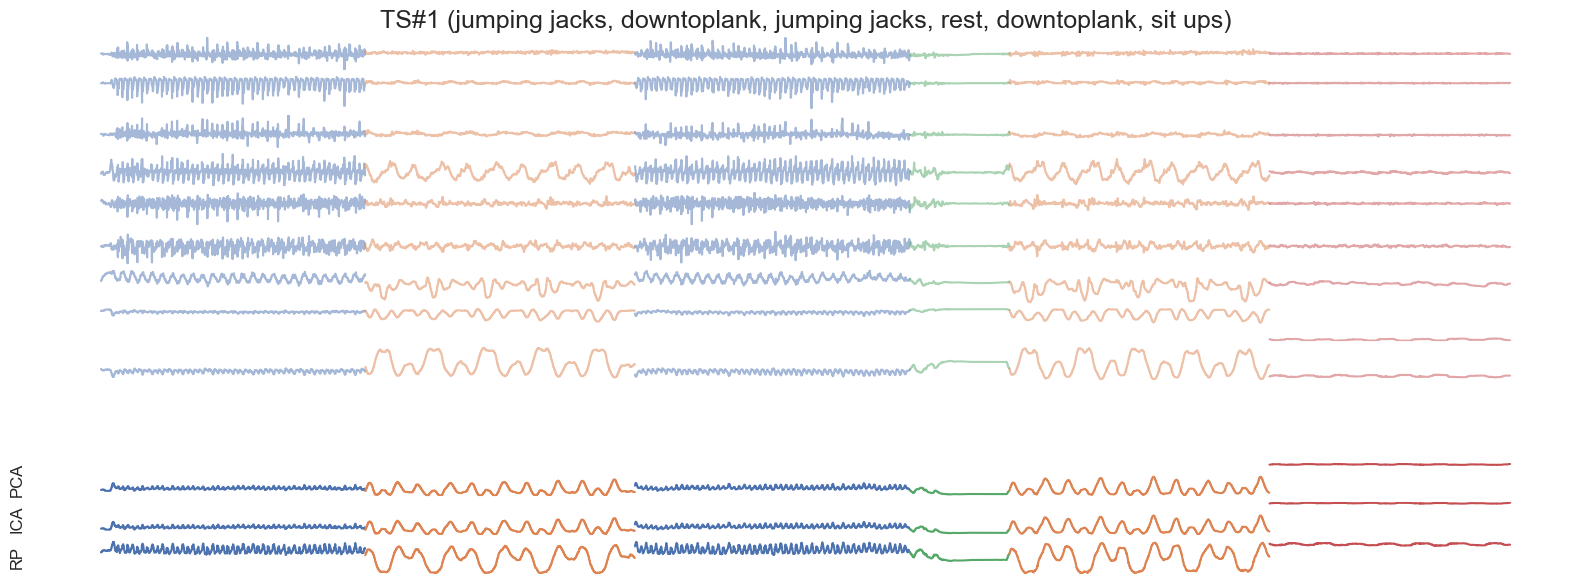

In [6]:
title = f"TS#{row.ts_id+1} ({', '.join(row.activities)})"
time_series = T + [np.zeros(0), np.zeros(0), t_pca, t_ica, t_rp]
sensor_names = [""] * (len(time_series)-3) + ["PCA", "ICA", "RP"] # df_data.columns[8:17].tolist()
change_points = row.change_points
activities = row.activities
font_size = 18

fig, axes = plt.subplots(
    len(time_series),
    sharex=True,
    gridspec_kw={'hspace': .1},
    figsize=(20, len(time_series) // 2)
)

activity_colours = {}
idx = 0

for activity in activities:
    if activity not in activity_colours:
        activity_colours[activity] = f"C{idx}"
        idx += 1

for idx, (ts, sensor, ax) in enumerate(zip(time_series, sensor_names, axes)):
    if len(ts) > 0:
        segments = [0] + change_points.tolist() + [ts.shape[0]]
        for kdx in np.arange(0, len(segments) - 1):
            ax.plot(
                np.arange(segments[kdx], segments[kdx + 1]),
                ts[segments[kdx]:segments[kdx + 1]],
                c=activity_colours[activities[kdx]],
                alpha=0.5 if idx < len(time_series) - 3 else 1
            )

    ax.set_ylabel(sensor, fontsize=12)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)

    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(font_size)
        
    ax.set_facecolor((1., 1., 1.))
        
    ax.tick_params(
        axis='both',          
        which='both',      
        labelbottom=False,
        labelleft=False
    )

axes[0].set_title(title, fontsize=18)

plt.savefig("../figures/dimensionality_reduction.pdf", bbox_inches="tight")